In [1]:
import os
ROOT_DIR = os.getcwd()
if ROOT_DIR.endswith("samples\\crack"):
    # Go up two levels to the repo root
    ROOT_DIR = os.path.dirname(os.path.dirname(ROOT_DIR))
MODEL_DIR = os.path.join(ROOT_DIR, "logs")
VIDEO_DIR = os.path.join(ROOT_DIR, "video")
import os
import skimage
from skimage import io

In [2]:
with open(os.path.join(VIDEO_DIR, "Camera_2\\Video.sff"), "rb") as f:
    byte = f.read(235)
#     while byte:
#         # Do stuff with byte.
#         byte = f.read(1)
    size = int.from_bytes(f.read(4), "little") 
    byte = f.read(size)

In [3]:
import os
import skimage
from skimage import io

img = io.imread(byte, plugin='imageio')

In [4]:
import sys
import random
import math
import re
import time
import numpy as np
import tensorflow as tf
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.patches as patches


# Import Mask RCNN
sys.path.append(ROOT_DIR)
import utils
import visualize
from visualize import display_images
import model as modellib
from model import log

import crack

%matplotlib inline 

Using TensorFlow backend.


In [5]:
# Device to load the neural network on.
# Useful if you're training a model on the same 
# machine, in which case use CPU and leave the
# GPU for training.
DEVICE = "/gpu:0"  # /cpu:0 or /gpu:0

# Inspect the model in training or inference modes
# values: 'inference' or 'training'
# TODO: code for 'training' test mode not ready yet
TEST_MODE = "inference"

In [6]:
config = crack.CrackConfig()
# Override the training configurations with a few
# changes for inferencing.
class InferenceConfig(config.__class__):
    # Run detection on one image at a time
    GPU_COUNT = 1
    IMAGES_PER_GPU = 1

config = InferenceConfig()
config.display()


Configurations:
BACKBONE                       resnet101
BACKBONE_STRIDES               [4, 8, 16, 32, 64]
BATCH_SIZE                     1
BBOX_STD_DEV                   [0.1 0.1 0.2 0.2]
COMPUTE_BACKBONE_SHAPE         None
DETECTION_MAX_INSTANCES        20
DETECTION_MIN_CONFIDENCE       0.7
DETECTION_NMS_THRESHOLD        0.3
FPN_CLASSIF_FC_LAYERS_SIZE     1024
GPU_COUNT                      1
GRADIENT_CLIP_NORM             5.0
IMAGES_PER_GPU                 1
IMAGE_CHANNEL_COUNT            3
IMAGE_MAX_DIM                  512
IMAGE_META_SIZE                14
IMAGE_MIN_DIM                  512
IMAGE_MIN_SCALE                0
IMAGE_RESIZE_MODE              square
IMAGE_SHAPE                    [512 512   3]
LEARNING_MOMENTUM              0.9
LEARNING_RATE                  0.002
LOSS_WEIGHTS                   {'rpn_class_loss': 1.0, 'rpn_bbox_loss': 1.0, 'mrcnn_class_loss': 1.0, 'mrcnn_bbox_loss': 1.0, 'mrcnn_mask_loss': 1.0}
MASK_POOL_SIZE                 14
MASK_SHAPE              

In [7]:
# Create model in inference mode
with tf.device(DEVICE):
    model = modellib.MaskRCNN(mode="inference", model_dir=MODEL_DIR,
                              config=config)

In [8]:
def get_ax(rows=1, cols=1, size=16):
    """Return a Matplotlib Axes array to be used in
    all visualizations in the notebook. Provide a
    central point to control graph sizes.
    
    Adjust the size attribute to control how big to render images
    """
    _, ax = plt.subplots(rows, cols, figsize=(size*cols, size*rows))
    return ax

In [9]:
# Set path to balloon weights file

# Download file from the Releases page and set its path
# https://github.com/matterport/Mask_RCNN/releases
# weights_path = ".//logs//coco20190405T2153//mask_rcnn_coco_0009.h5"
# weights_path = os.path.join(MODEL_DIR, "coco20190417T1913\\mask_rcnn_coco_0040.h5")
weights_path = os.path.join(MODEL_DIR, "coco20190430T1213\\mask_rcnn_coco_0060.h5")
# weights_path = "mask_rcnn_coco_0060.h5"

# Or, load the last model you trained
# weights_path = model.find_last()[1]

# Load weights
print("Loading weights ", weights_path)
model.load_weights(weights_path, by_name=True)
# exclude=["mrcnn_class_logits", "mrcnn_bbox_fc", "mrcnn_bbox", "mrcnn_mask"])

Loading weights  D:\Work\Study\PhD\Mask R-CNN\Mask_RCNN-2.1\logs\coco20190430T1213\mask_rcnn_coco_0060.h5
Re-starting from epoch 60


In [10]:
class_names = ['BG', 'linear crack']

Processing 1 images
image                    shape: (1536, 2048, 3)       min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 512, 512, 3)      min: -123.70000  max:  151.10000  float64
image_metas              shape: (1, 14)               min:    0.00000  max: 2048.00000  float64
anchors                  shape: (1, 65472, 4)         min:   -0.70849  max:    1.58325  float32


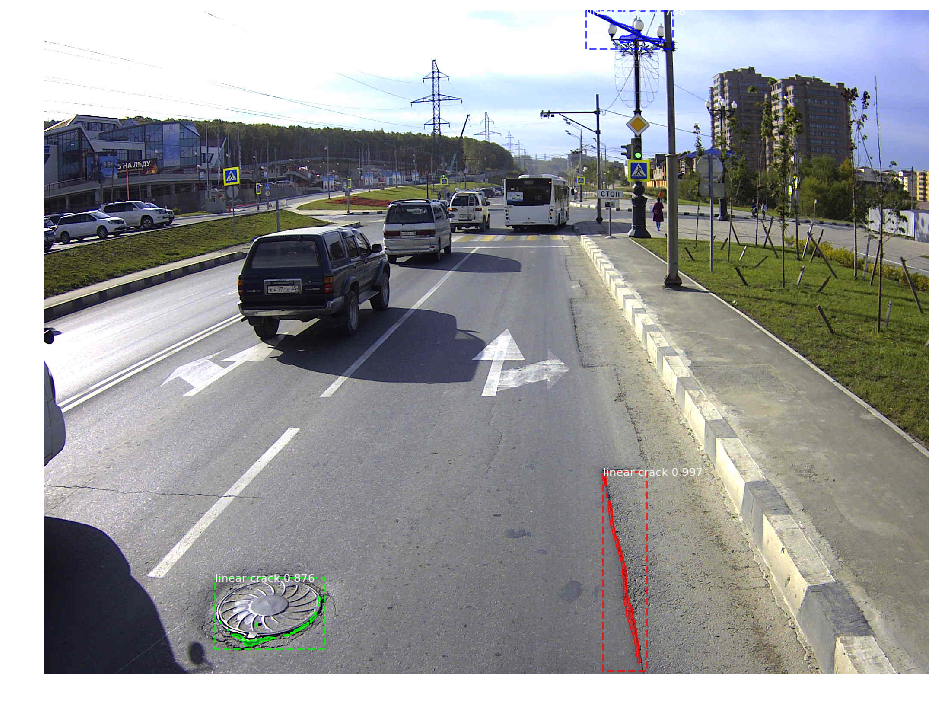

In [12]:
# Run detection
results = model.detect([img], verbose=1)

# Visualize results
r = results[0]
image = visualize.display_instances(img, r['rois'], r['masks'], r['class_ids'], 
                            class_names, r['scores'])

In [12]:
model.config.DETECTION_NMS_THRESHOLD

0.3

In [15]:
import cv2

video_name = 'video2_2.avi'

height, width, layers = img.shape

video = cv2.VideoWriter(video_name, 0, 1, (width,height))

with open(os.path.join(VIDEO_DIR, "Camera_2\\Video.sff"), "rb") as f:
    byte = f.read(235)
    for i in range(50):
        size = int.from_bytes(f.read(4), "little") 
        byte = f.read(size)
        
        img = io.imread(byte, plugin='imageio')
        results = model.detect([img], verbose=1)
        # Visualize results
        r = results[0]
        
        image = visualize.save_image(img, i, r['rois'], r['masks'],
                                r['class_ids'],r['scores'],class_names,scores_thresh=0.9,mode=0, return_image=True)
        if image is None:
            destRGB = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        else:
            destRGB = cv2.cvtColor(np.array(image), cv2.COLOR_BGR2RGB)
        video.write(destRGB)
        
        byte = f.read(12)

cv2.destroyAllWindows()
video.release()

Processing 1 images
image                    shape: (1536, 2048, 3)       min:    0.00000  max:  255.00000
molded_images            shape: (1, 512, 512, 3)      min: -123.70000  max:  151.10000
image_metas              shape: (1, 10)               min:    0.00000  max: 2048.00000
Processing 1 images
image                    shape: (1536, 2048, 3)       min:    0.00000  max:  255.00000
molded_images            shape: (1, 512, 512, 3)      min: -123.70000  max:  151.10000
image_metas              shape: (1, 10)               min:    0.00000  max: 2048.00000
Processing 1 images
image                    shape: (1536, 2048, 3)       min:    0.00000  max:  255.00000
molded_images            shape: (1, 512, 512, 3)      min: -123.70000  max:  151.10000
image_metas              shape: (1, 10)               min:    0.00000  max: 2048.00000
Processing 1 images
image                    shape: (1536, 2048, 3)       min:    0.00000  max:  255.00000
molded_images            shape: (1, 512, 512, 3)  

Processing 1 images
image                    shape: (1536, 2048, 3)       min:    0.00000  max:  255.00000
molded_images            shape: (1, 512, 512, 3)      min: -123.70000  max:  151.10000
image_metas              shape: (1, 10)               min:    0.00000  max: 2048.00000
Processing 1 images
image                    shape: (1536, 2048, 3)       min:    0.00000  max:  255.00000
molded_images            shape: (1, 512, 512, 3)      min: -123.70000  max:  151.10000
image_metas              shape: (1, 10)               min:    0.00000  max: 2048.00000
Processing 1 images
image                    shape: (1536, 2048, 3)       min:    0.00000  max:  255.00000
molded_images            shape: (1, 512, 512, 3)      min: -123.70000  max:  151.10000
image_metas              shape: (1, 10)               min:    0.00000  max: 2048.00000
Processing 1 images
image                    shape: (1536, 2048, 3)       min:    0.00000  max:  255.00000
molded_images            shape: (1, 512, 512, 3)  

In [20]:
img.shape

(1536, 2048, 3)

In [31]:
config.DETECTION_NMS_THRESHOLD

0.3